In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf



In [198]:
df = pd.read_csv('csv/GoogleStockPrices.csv',parse_dates = [0] )

In [199]:
df.describe().round(2)

,Date,Open,High,Low,Close,Volume
count,2516,2516.00,2516.00,2516.00,2516.00,2.516000e+03
mean,2020-01-01 11:02:23.799682048,82.68,83.56,81.83,82.71,8.797572e+06
min,2015-01-02 16:00:00,24.96,25.01,24.55,24.85,4.656380e+05
25%,2017-07-02 22:00:00,47.37,47.64,47.00,47.38,1.398751e+06
50%,2020-01-01 16:00:00,64.53,65.04,63.94,64.71,1.876044e+06
75%,2022-06-30 22:00:00,119.66,121.04,118.59,119.70,6.056782e+06
max,2024-12-31 16:00:00,197.25,201.42,194.98,196.66,1.194550e+08
std,NaN,43.72,44.21,43.26,43.74,1.365305e+07


In [200]:
dias_que_subiu = (df['Close'] > df['Close'].shift(1)).sum()
print(f'O preço subiu em {dias_que_subiu} dias.')

O preço subiu em 1345 dias.


#### Gráfico do preço de fechamento: 

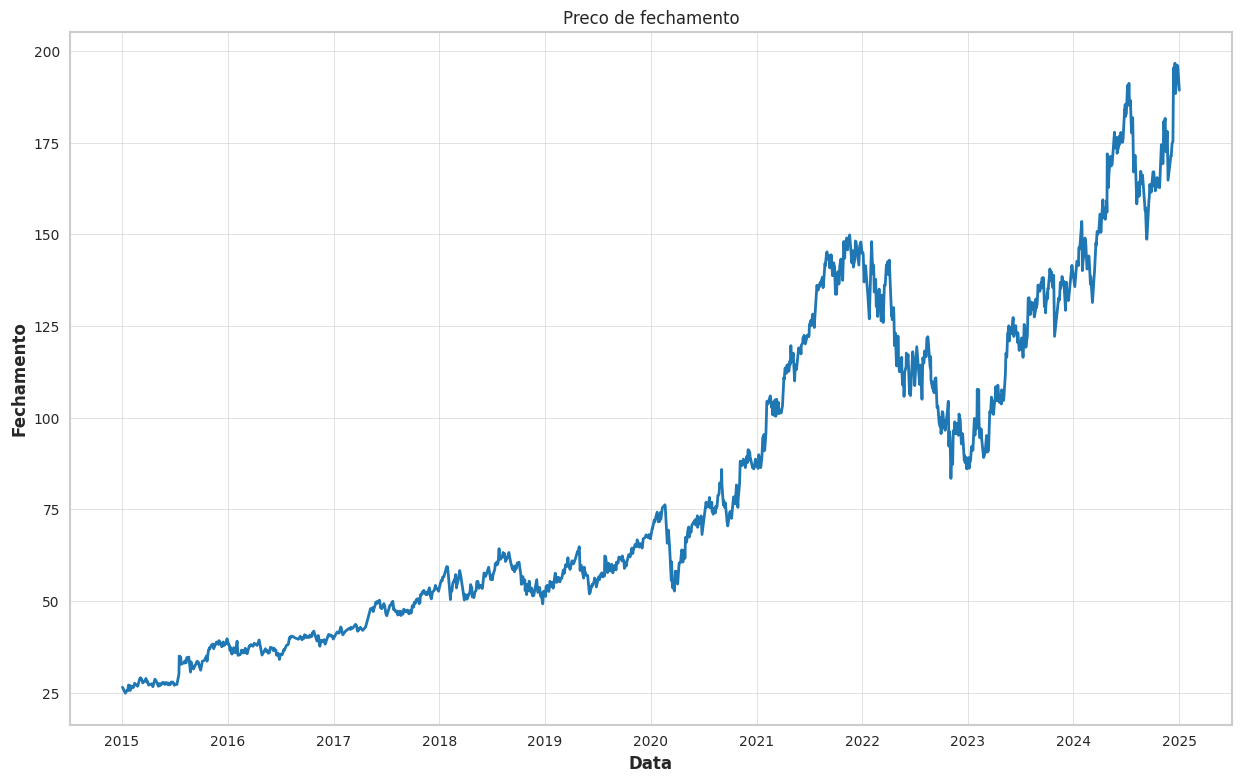

In [201]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (15,9))
    grafico = sns.lineplot(data = df, x = 'Date',y = 'Close')
    grafico.set(title = 'Preco de fechamento', xlabel = 'Data', ylabel = 'Fechamento')


#### Grafico de 2024:


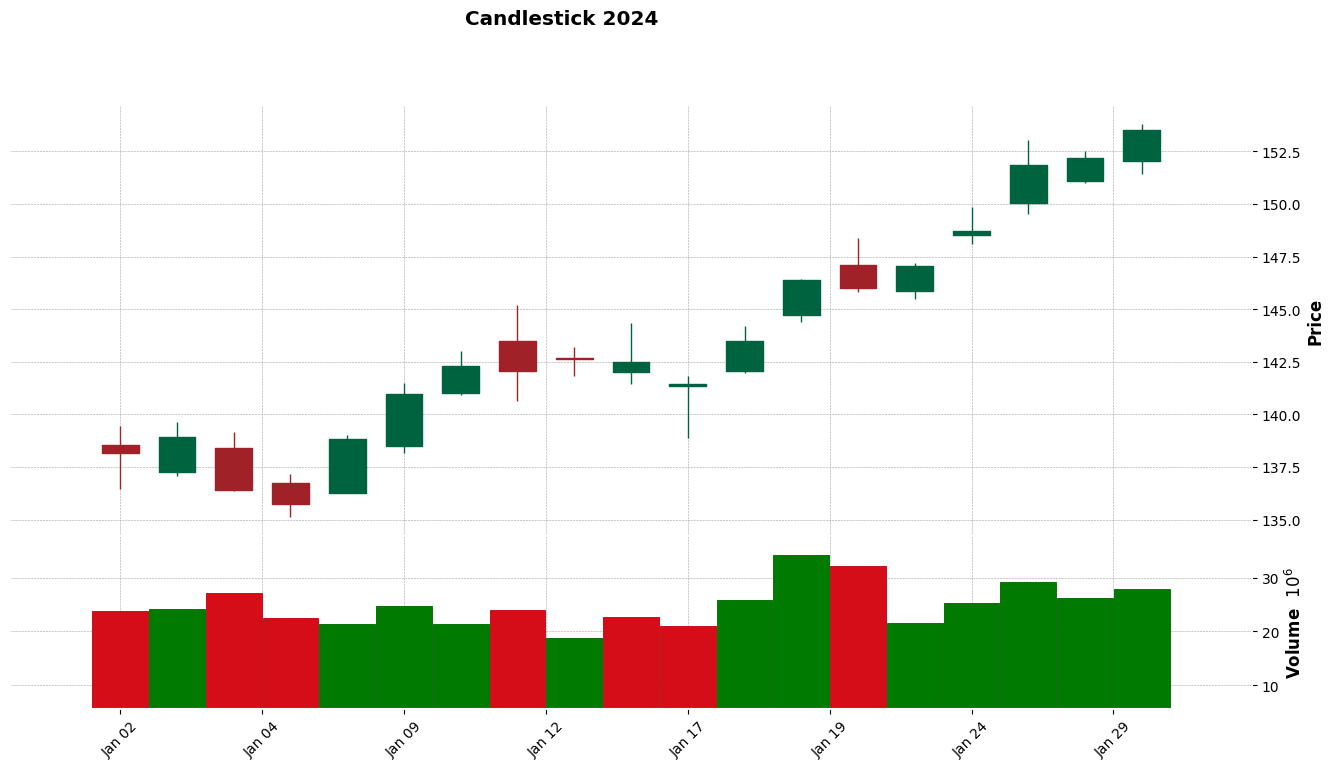

In [202]:

df['Date'] = pd.to_datetime(df['Date'])


df_2024 = df.query('Date >= "2024-01-01" and Date <= "2024-01-30"').copy()

df_2024.set_index('Date', inplace=True)

mpf.plot(df_2024, type='candle', style='charles', title='Candlestick 2024', volume=True,figratio=(20, 10),figscale=1.5 )



In [203]:
volume_2015 = df.query('Date >= "2015-01-01"and Date <= "2015-12-31"').copy()
volume_2015_media = volume_2015['Volume'].mean()
volume_2024 = df.query('Date >= "2024-01-01"and Date <= "2024-12-31"').copy()
volume_2024_media = volume_2024['Volume'].mean()


In [204]:
diferenca_volume = (volume_2024_media - volume_2015_media)
print(f'Volume médio em 2015: {volume_2015_media:,.0f}')
print(f'Volume médio em 2024: {volume_2024_media:,.0f}')
print(f'Diferença: {diferenca_volume:,.0f}')

Volume médio em 2015: 2,172,317
Volume médio em 2024: 27,500,206
Diferença: 25,327,889


#### Média móvel de 20 dias do preço de fechamento:

In [205]:
df['MM20'] = df['Close'].rolling(window=20).mean()

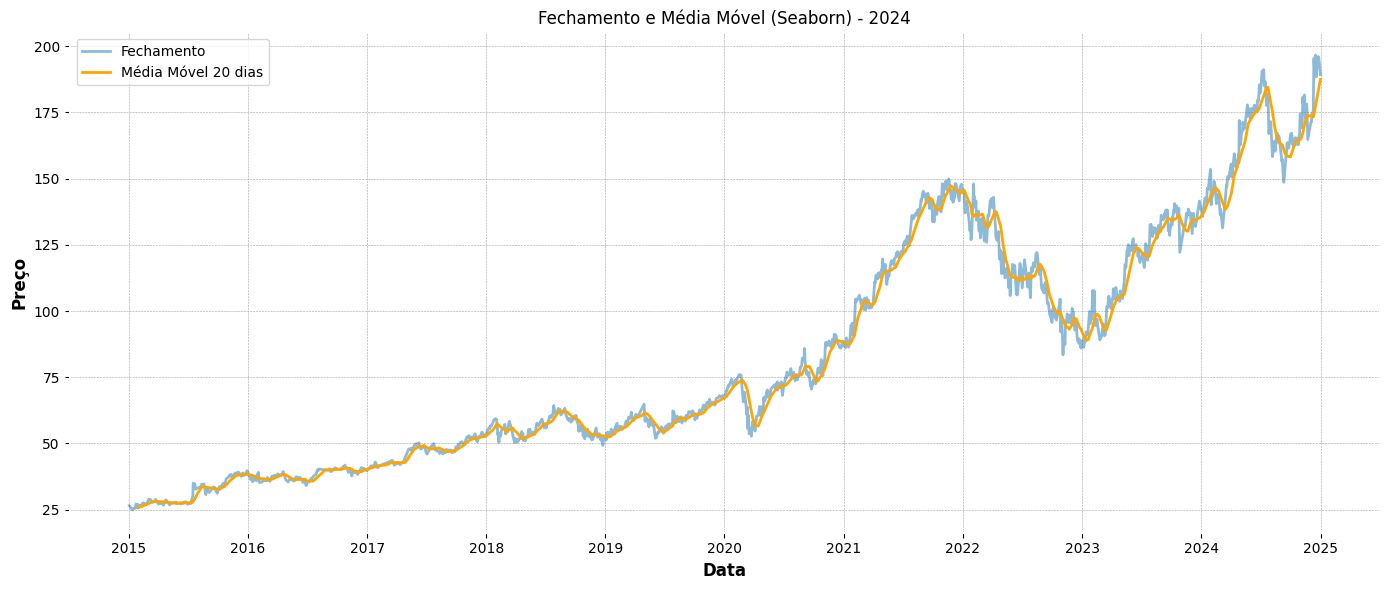

In [206]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Close', data=df, label='Fechamento', alpha=0.5)
sns.lineplot(x='Date', y='MM20', data=df, label='Média Móvel 20 dias', color='orange')
plt.title('Fechamento e Média Móvel (Seaborn) - 2024')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Distribuição Retorno Diário:

In [207]:
df['Retorno_Diario'] = df['Close'].pct_change()
df_limp = df.dropna(subset=['Retorno_Diario'])

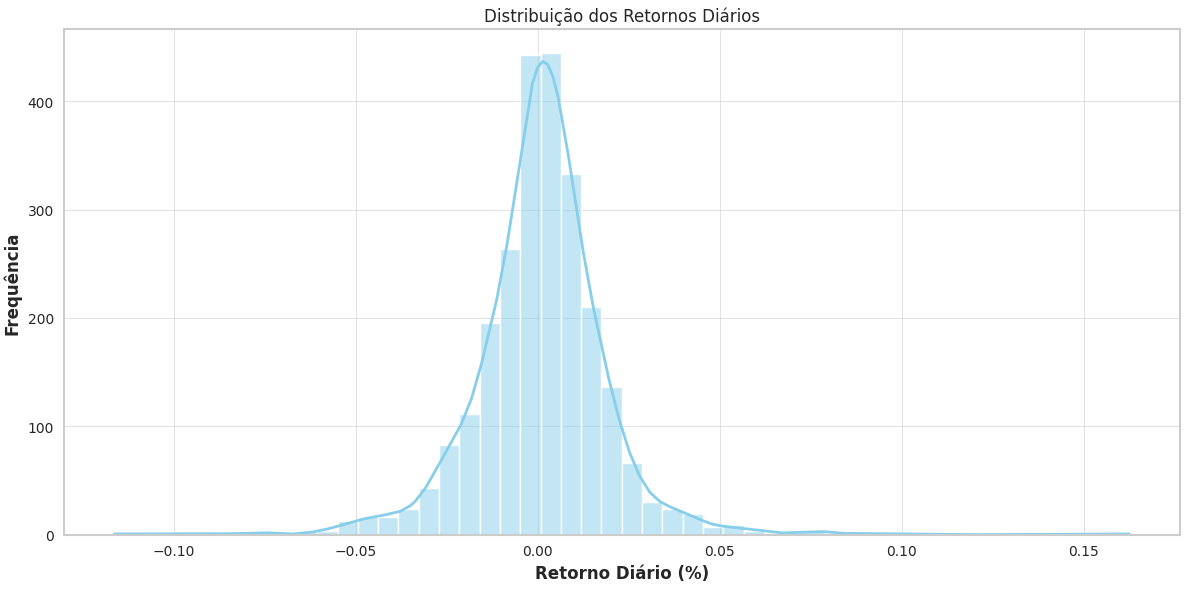

In [208]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12,6))
    grafico = sns.histplot(data = df_limp, x = 'Retorno_Diario', kde = True,bins = 50,color='skyblue')
    grafico.set(title = 'Distribuição dos Retornos Diários', xlabel = 'Retorno Diário (%)',ylabel = 'Frequência')
    plt.title('Distribuição dos Retornos Diários')
    plt.tight_layout()


#### RSI (Índice de Força Relativa) e identifique momentos de sobrecompra/sobrevenda:

In [209]:
df['variacao_Close'] = df['Close'].diff()

df['ganho'] = df['variacao_Close'].clip(lower = 0)
df['perda'] = -df['variacao_Close'].clip(upper = 0)
df['perda'] = df['perda'].abs()# Remove o sinal

ganhos_eme = df['ganho'].ewm(span = 14,adjust = False).mean() # span mostra de quantos em quantos dias a media vai ser tirada
perdas_eme = df['perda'].ewm(span = 14,adjust = False).mean()

rs = ganhos_eme / perdas_eme

df['RSI'] = 100 - (100 / (1 + rs)).round(2)

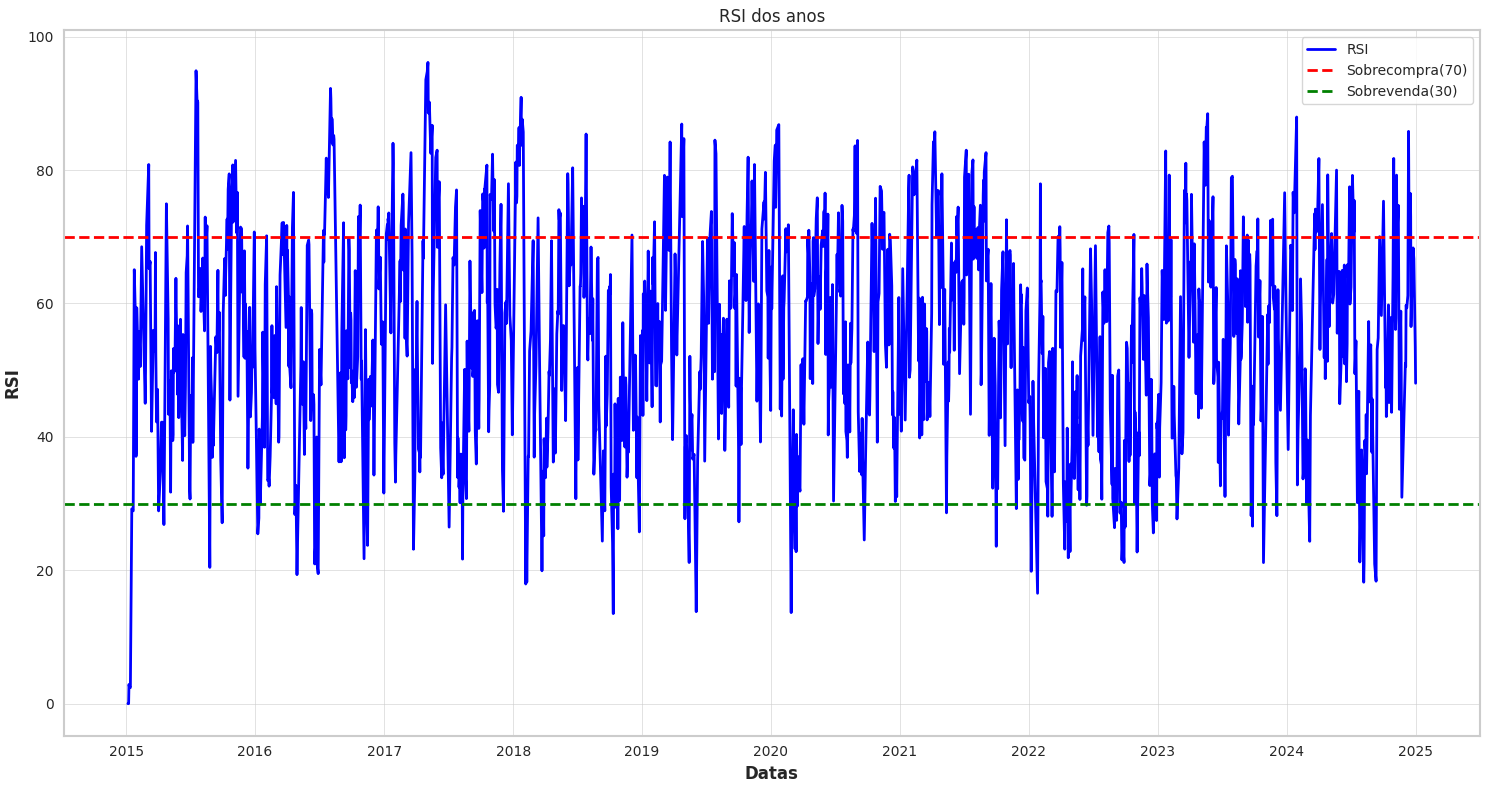

In [210]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (15,8))
    grafico = sns.lineplot(data = df, x = 'Date', y = 'RSI', color = 'blue', label = 'RSI')
    plt.axhline(70, color = 'red', linestyle = '--',label = 'Sobrecompra(70)')
    plt.axhline(30, color = 'green', linestyle = '--', label = 'Sobrevenda(30)')
    grafico.set(title = 'RSI dos anos', xlabel = 'Datas', ylabel = 'RSI')
    plt.tight_layout()
    plt.legend()

#### Sistema de cruzamento de médias móveis:

In [211]:
df

,Date,Open,High,Low,Close,Volume,MM20,Retorno_Diario,variacao_Close,ganho,perda,RSI
0,2015-01-02 16:00:00,26.63,26.79,26.39,26.48,1327870,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05 16:00:00,26.36,26.40,25.89,25.97,2059119,NaN,-0.019260,-0.51,0.00,0.51,0.00
2,2015-01-06 16:00:00,26.02,26.06,25.28,25.33,2731813,NaN,-0.024644,-0.64,0.00,0.64,0.00
3,2015-01-07 16:00:00,25.55,25.57,25.18,25.26,2345875,NaN,-0.002764,-0.07,0.00,0.07,0.00
4,2015-01-08 16:00:00,25.08,25.38,24.75,25.35,3662224,NaN,0.003563,0.09,0.09,0.00,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-12-24 13:05:00,194.84,196.11,193.78,196.11,10403259,183.0355,0.007604,1.48,1.48,0.00,68.33
2512,2024-12-26 16:00:00,195.15,196.75,194.38,195.60,12057210,184.3595,-0.002601,-0.51,0.00,0.51,66.70
2513,2024-12-27 16:00:00,194.95,195.32,190.65,192.76,18891362,185.5360,-0.014519,-2.84,0.00,2.84,57.81
2514,2024-12-30 16:00:00,189.80,192.55,189.12,191.24,14264659,186.6505,-0.007885,-1.52,0.00,1.52,53.42


In [212]:
df['MM_curta'] = df['Close'].rolling(20).mean()
df['MM_longa'] = df['Close'].rolling(50).mean()

# sinal básico: 1 quando curta > longa, 0 caso contrário
df['posicao'] = (df['MM_curta'] > df['MM_longa']).astype(int)

# pontos de cruzamento (quando a posição muda de um dia pro outro)
df['cruzou'] = df['posicao'].diff()

# interpretações:
# df['cruzou'] == +1  -> cruzamento de ALTA (compra)
# df['cruzou'] == -1  -> cruzamento de BAIXA (venda)


In [213]:

df['ret'] = df['Close'].pct_change()
df['posicao_shift'] = df['posicao'].shift(1)
df['ret_estrategia'] = df['posicao_shift'] * df['ret']

perf_buy_hold = (1 + df['ret']).cumprod()
perf_estrategia = (1 + df['ret_estrategia']).cumprod()

df['EMA_curta'] = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA_longa'] = df['Close'].ewm(span=50, adjust=False).mean()

df['EMA_curta'] = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA_longa'] = df['Close'].ewm(span=50, adjust=False).mean()

####  Maiores drawdowns:

In [214]:
df['Pico_Anterior'] = df['Close'].cummax()
df['Drawdown'] = (df['Close'] - df['Pico_Anterior']) / df['Pico_Anterior']

maiores_dd = df.nsmallest(5, 'Drawdown').round(3)
print(maiores_dd[['Date', 'Close', 'Pico_Anterior', 'Drawdown']])

                    Date  Close  Pico_Anterior  Drawdown
1974 2022-11-03 16:00:00  83.43         149.84    -0.443
2011 2022-12-28 16:00:00  86.02         149.84    -0.426
2016 2023-01-05 16:00:00  86.20         149.84    -0.425
1975 2022-11-04 16:00:00  86.58         149.84    -0.422
1973 2022-11-02 16:00:00  86.97         149.84    -0.420


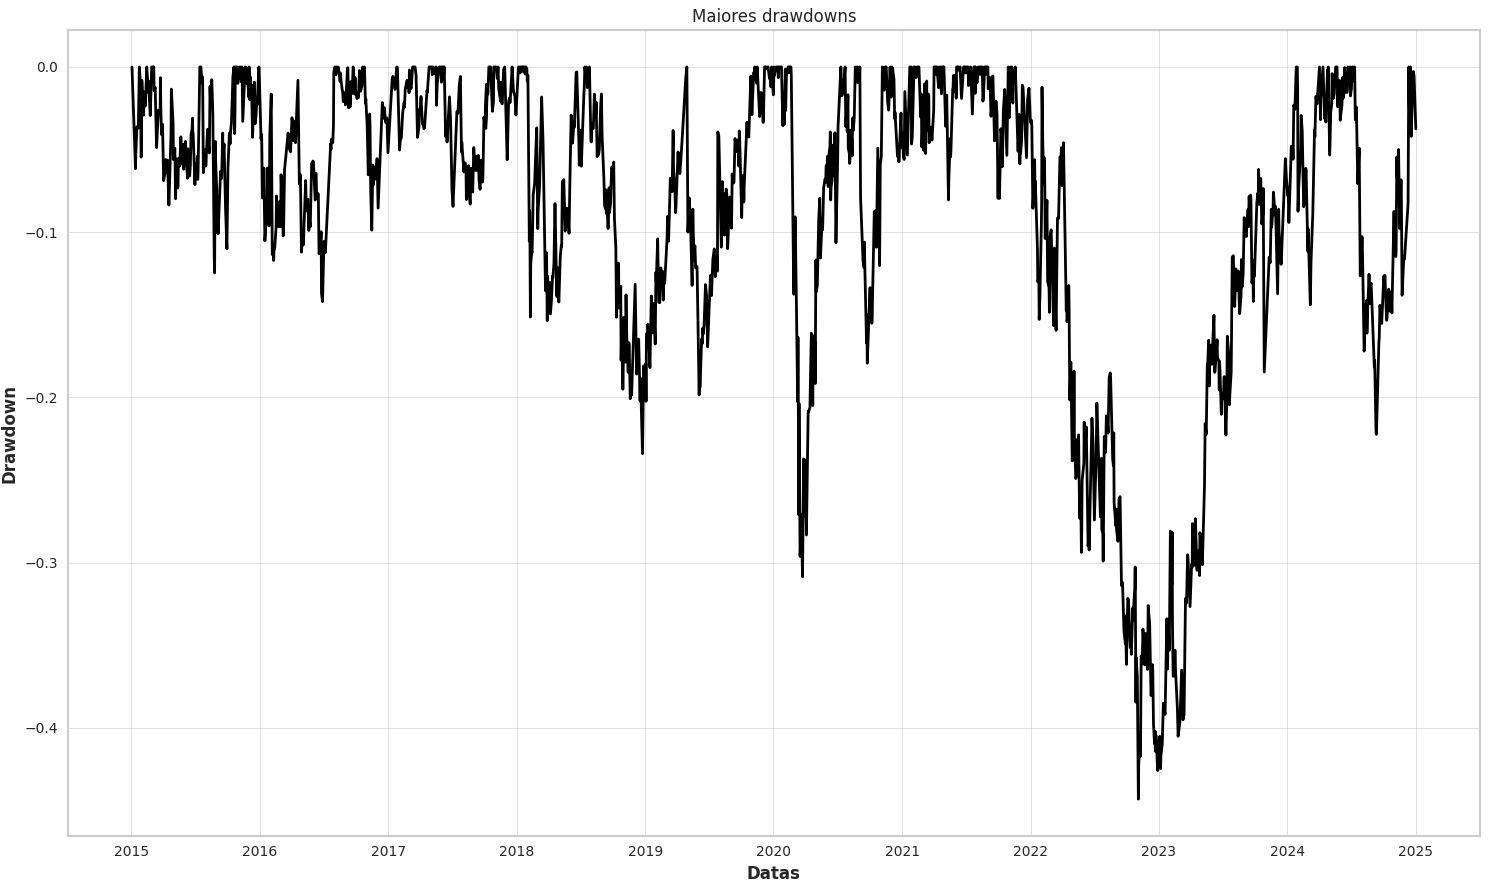

In [215]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (15,9))
    grafico = sns.lineplot(data = df, x = 'Date', y = 'Drawdown',color = 'black')
    grafico.set(title = 'Maiores drawdowns', xlabel = 'Datas', ylabel = 'Drawdown')
    plt.tight_layout()

#### Modelos ARIMA para prever o preço de fechamento nos próximos 10 dias:

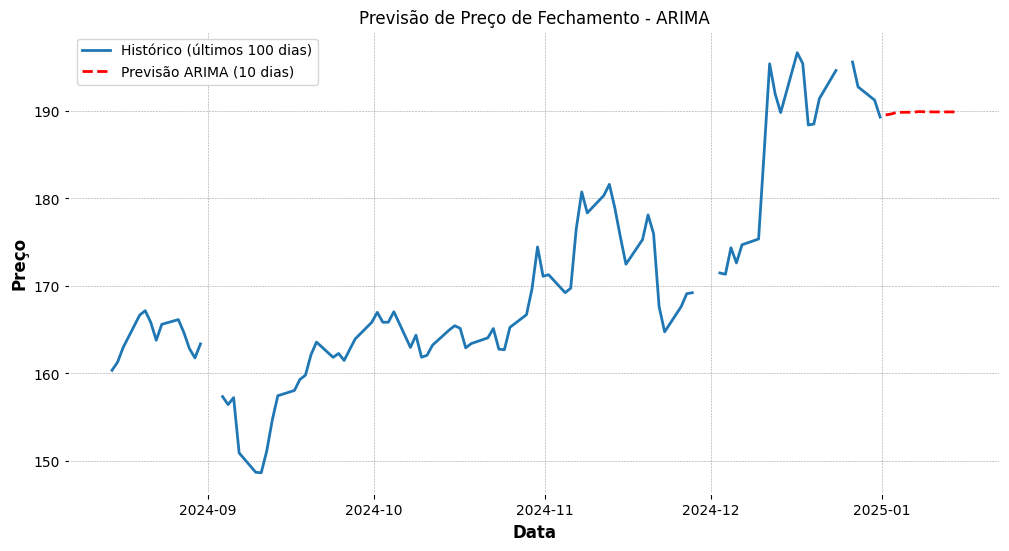

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Garantir que a coluna Date é datetime e está como índice
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Define frequência (B = dias úteis)
df = df.asfreq('B')

# Selecionar apenas o fechamento
fechamento = df['Close']

# Criar e treinar o modelo ARIMA (parâmetros p,d,q escolhidos manualmente aqui como exemplo)
modelo = ARIMA(fechamento, order=(5,1,0))
modelo_treinado = modelo.fit()

# Fazer previsão para os próximos 10 dias
previsao = modelo_treinado.forecast(steps=10)

# Criar DataFrame com previsões
datas_previstas = pd.date_range(start=fechamento.index[-1] + pd.Timedelta(days=1), periods=10, freq='B')  # dias úteis
df_previsao = pd.DataFrame({'Close_Previsto': previsao}, index=datas_previstas)
df = df.asfreq('B')

plt.figure(figsize=(12,6))
plt.plot(fechamento[-100:], label='Histórico (últimos 100 dias)')
plt.plot(df_previsao, label='Previsão ARIMA (10 dias)', linestyle='--', color='red')
plt.title('Previsão de Preço de Fechamento - ARIMA')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()

#### Clusterize os dias de negociação"Volatilidade" e "Volume":

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Criar df_cluster a partir das colunas necessárias
df_cluster = df[['High', 'Low', 'Close', 'Volume']].copy()

# Calcular volatilidade
df_cluster['Volatilidade'] = (df_cluster['High'] - df_cluster['Low']) / df_cluster['Close']

# Selecionar features
features = df_cluster[['Volatilidade', 'Volume']]

# Preencher valores faltantes com zero
df_cluster = df_cluster.fillna(0)

# Normalizar dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Rodar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(features_scaled)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volatilidade', y='Volume', hue='Cluster',
                palette='viridis', data=df_cluster)
plt.title('Clusterização de Dias de Negociação (Volatilidade vs Volume)')
plt.xlabel('Volatilidade')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

